# Clase 23: Redes Neuronales 2

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**

Basado en las clases de Nicolás Caro


## Redes Neuronales

Las redes neuronales pueden ser descritas como un modelo matemático de procesamiento de información compuesto por muchas funciones anidadas. Estas funciones están definidas por sus parámetros $w$.

En general, una red neuronal puede considerarse como un sistema con las siguientes características:

1. El procesamiento de la información ocurre en unidades llamadas neuronas.

$$
y=f\left(\sum_{i} x_{i} w_{i}+b\right)
$$

<div align='center'>
<img src='./resources/neuron.png' width=600/>
</div>

<div align='center'>
   Fuente: <a href='https://www.researchgate.net/figure/The-structure-of-the-artificial-neuron_fig2_328733599
 '> https://www.researchgate.net/figure/The-structure-of-the-artificial-neuron_fig2_328733599
</a>
</div>

<br>

Acá se hace el calculó $w x + b = \sum_i x_i w_i + b$ sobre los inputs $x_i$ y los pesos $w_i$. Estos últimos, son valores numéricos que representan las conexiones entre neuronas, el peso $b$ se denomina *bias*. Luego, la salida es el resultado de aplicar la función de activación $f(\cdot)$ sobre $w x + b$.


2. Las neuronas están conectadas e intercambian información (o señales) por medio de sus conexiones.
3. Las conexiones entre neuronas pueden ser fuertes o débiles, dependiendo de como se procesa la información.
4. Cada neurona tiene un estado interno determinado por todas las conexiones que posee.
5. Cada neurona tiene una función de activación que opera sobre su estado, esta función determina la información que se comparte a otras neuronas.

<div align='center'>
<img src='./resources/nn.png' width=600/>
</div>

<div align='center'>
   Fuente: <a href='https://www.researchgate.net/figure/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o_fig1_321259051 '> https://www.researchgate.net/figure/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o_fig1_321259051</a>
</div>

<br>



Podemos decir que una red neuronal posee:

- Una **arquitectura** que describe el tipo de neuronas y el conjunto de conexiones entre estas 
<div align='center'>
<img src='./resources/nn_zoo.png'/>
</div>

<div align='center'>
   Fuente: <a href='https://www.asimovinstitute.org/neural-network-zoo/'> https://www.asimovinstitute.org/neural-network-zoo/</a>
</div>

Ademas, cada unidad posee una función de activación

<div align='center'>
<img src='./resources/activation_fn.png' width=600/>
</div>

<div align='center'>
   Fuente: <a href='https://www.researchgate.net/figure/Various-forms-of-non-linear-activation-functions-Figure-adopted-from-Caffe-Tutorial_fig3_315667264'> https://www.researchgate.net/figure/Various-forms-of-non-linear-activation-functions-Figure-adopted-from-Caffe-Tutorial_fig3_315667264</a>
</div>

- Un proceso de **aprendizaje** asociado, que describe el proceso en el que la red aprende a resolver mejor la tarea entregada. La idea general es simple: 


  1. **Forward Propagation**: Predecir los ejemplos de entrenamiento (o forward).
  2. **Backward Propagation**: Calcular un error y ajustar los parámetros de la red de forma proporcional al su valor sobre todos los pesos de la red (o backward). Tal como el caso del perceptrón, optimizamos estos valores usando descenso del gradiente pero de forma generalizada en cada capa. La idea es que se calculan los gradientes y luego se actualizan los pesos de cada unidad.
  
  Según wikipedia: 
  > Las salidas de error se propagan hacia atrás, partiendo de la capa de salida, hacia todas las neuronas de la capa oculta que contribuyen directamente a la salida. Sin embargo las neuronas de la capa oculta solo reciben una fracción de la señal total del error, basándose aproximadamente en la contribución relativa que haya aportado cada neurona a la salida original. Este proceso se repite, capa por capa, hasta que todas las neuronas de la red hayan recibido una señal de error que describa su contribución relativa al error total. 

### Aprendizaje en `Pytorch`

En `Pytorch` es posible implementar reglas de actualización basadas en propagación hacia atrás de manera automática. Para ello, es necesario comprender los tipos de datos asociados a esta librería. 

En primer lugar, se tienen los **tensores**, estos son arreglos n dimensionales, soportan almacenamiento en GPU. Las operaciones y sintaxis de este tipo de objetos es muy similar a los arreglos de NumPy. 

**Ejemplo**

Pytorch se mimetiza con NumPy en cuanto a la definición de sus métodos y compatibilidad cruzada, por ejemplo, para definir un arreglo de 2x2 se puede utilizar la función `randn` (análoga a la de NumPy)

In [60]:
import numpy as np
import torch

x = torch.randn(2, 2)
x

tensor([[ 0.5804, -0.7407],
        [-0.6842, -0.1303]])

In [62]:
x = np.random.randn(2, 2)
x

array([[-1.10645707,  0.91569546],
       [ 0.55212371, -0.12761742]])

Se pueden importar arreglos de numpy de manera bastante sencilla

In [38]:
x = np.random.randn(2, 2)
x = torch.from_numpy(x)
x

tensor([[-0.3519,  1.2332],
        [-0.2262,  0.6346]], dtype=torch.float64)

La función `torch.cuda.is_available()` permite detectar si existe una GPU disponble para computo. En caso afirmativo, se pueden cargar tensores en la GPU para su posterior computo, para ello, se utiliza la función `torch.device()` y el método `.to()` de los objetos `Tensor`.

**Ejemplo**


In [63]:
torch.cuda.is_available()

False

In [64]:
x = torch.empty((2, 2))
x

tensor([[0.0000e+00, 0.0000e+00],
        [1.5167e+25, 4.5607e-41]])

se modifica `x` de manera inplace en la CPU

In [65]:
x.add_(1)

tensor([[1.0000e+00, 1.0000e+00],
        [1.5167e+25, 1.0000e+00]])

Se define un flujo en la CPU

In [66]:
# Se detecta la presencia de una GPU
if torch.cuda.is_available():
    # Se obtiene un objeto que apunta a la GPU descubierta
    device = torch.device("cuda")
else:
    # en el caso contrario,
    device = torch.device("cpu")

# Se crea un tensor y se carga en el dispositivo especificado en device
y = torch.ones_like(x, device=device)  #

# Se envia un vector a la GPU luego de ser definido
x = x.to(device)

# Se obtiene un resultado en la GPU y se transfiere a la CPU
z = x + y
print("z en GPU: \n", z)
print("z en CPU:\n", z.to("cpu", torch.double))

z en GPU: 
 tensor([[2.0000e+00, 2.0000e+00],
        [1.5167e+25, 2.0000e+00]])
z en CPU:
 tensor([[2.0000e+00, 2.0000e+00],
        [1.5167e+25, 2.0000e+00]], dtype=torch.float64)


In [67]:
device

device(type='cpu')

**Ejercicio**

1. ¿Qué notación común siguen las operaciones *in place* para tensores?

El motor central en las redes neuronales de PyTorch es la librería  `autograd`. Esta entrega herramientas de diferenciacion automatica para todas las operaciones hechas sobre objetos tipo `Tensor`. 


Como se estudio anteriormente, los tensores son objetos similares a los arreglos de NumPy en cuanto a sus métodos y manejo. Aparte de permitir el computo en GPU, poseen el atributo  el atributo booleano `.requires_grad`. Si para un tensor, tal atributo tiene el valor `True`, se comienzan a registrar todas operaciones aplicadas aplicadas sobre este. Tal registro se lleva a cabo de manera a automática, generando una estructura jeraquica codificada en un grafo denotado como **DCG** (grafo dinámico computacional). 



### Grafo Dinámico Computacional (DCG)

Un **DCG** grafo es grafo acíclico y dirigido, sus hojas son en efecto, los tensores siendo seguidos (*input*) y las raíces son los tensores de respuesta luego de la última operación (*output*). Tal grafo permite calcular gradientes para cada parámetro.


<div align='center'>
<img src='./resources/grafo_comp.png' width=600/>
</div>



Para generar el registro antes descrito, las operaciones realizadas sobre un tensor input son asociadas a una operación por medio de la clase `Function`. Cada tensor del cual se lleva un registro, tendrá el atributo `.grad_fn` que referencia al objeto de clase `Function` que dio origien a tal tensor. En el caso de tensores creados explícitamente, `.grad_fn`será `None`. 



**Ejemplo**

Creamos dos tensores con algunos valores

In [69]:
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([6.0, 4.0], requires_grad=True)

In [70]:
a

tensor([2., 3.], requires_grad=True)

In [71]:
b

tensor([6., 4.], requires_grad=True)

Y luego los operamos según:
$$Q = 3a ^3 - b ^ 2$$    
    

In [72]:
Q = 3 * a ** 3 - b ** 2

In [73]:
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

Los gradientes de esta operación serán:
    
$$\frac{\partial Q}{a} = 9a ^ 2$$
y 
$$\frac{\partial Q}{b} = -2b$$
 

Por lo tanto, el grafo generado será: 
    
<div align='center'>
<img src='./resources/ej_1.png' width=600/>
</div>


Al llamar a `Q.backward()`, `autograd` calcula automáticamente los gradientes para `a` y `b`

In [74]:
external_grad = torch.tensor([1.0, 1.0])

Q.backward(gradient=external_grad)

Como el resultado tiene dos elementos, las derivadas parciales serán calculadas en cada dimensión.

Noten que en el caso anterior entregamos un gradiente externo a través de `external_grad`. Esto es en la práctica, entregarle los valores iniciales a `backguard()` para que luego los propague. Fijense que la derivada parcial de Q respecto a si mismo es: 


$$\frac{\partial Q}{\partial Q} = 1$$


Luego, al ser evaluados, los valores serán: 


<div align='center'>
<img src='./resources/ej_2.png' width=600/>
</div>

In [75]:
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [76]:
a.grad

tensor([36., 81.])

In [77]:
b.grad

tensor([-12.,  -8.])

> **Nota:** Para hacer operaciones sin registrar gradientes se utiliza el context manager `torch.no_grad()`.

In [79]:
x = torch.tensor(25.0, requires_grad=True)
y = x * 2

print("Se requiere gradiente en y:", y.requires_grad)

with torch.no_grad():
    y = x * 2
    print("Se requiere gradiente en y (context manager): ", y.requires_grad)

Se requiere gradiente en y: True
Se requiere gradiente en y (context manager):  False



En términos generales, si se tiene una función vectorial $\vec{y}=f(\vec{x})$, entonces el gradiente de $\vec{y}$ con respecto a $\vec{x}$ es la matriz Jacobiana:
$$
J=\left(\begin{array}{ccc}\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\ \vdots & \ddots & \vdots \\ \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}\end{array}\right)
$$

Para efectuar el algoritmo de propagación hacia atrás, `torch.autograd` calcula productos entre matrices jacobianas y vectores, por lo que dado un vector $v=\left(v_{1} , v_{2} , \ldots , v_{m}\right)^{T}$, se calcula $v^{T} \cdot J$. Si en tal caso, $v$ es el gradiente de una función escalar $l=g(\vec{y})$, es decir, $v=\left( \frac{\partial l}{\partial y_{1}} , \cdots , \frac{\partial l}{\partial y_{m}}\right)^{T}$, entonces por la regla de la cadena, el producto siguiente
$$
J^{T} \cdot v=\left(\begin{array}{ccc}\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}} \\ \vdots & \ddots & \vdots \\ \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}\end{array}\right)\left(\begin{array}{c}\frac{\partial l}{\partial y_{1}} \\ \vdots \\ \frac{\partial l}{\partial y_{m}}\end{array}\right)=\left(\begin{array}{c}\frac{\partial l}{\partial x_{1}} \\ \vdots \\ \frac{\partial l}{\partial x_{n}}\end{array}\right)
$$

Pasa a ser el gradiente de $l$ con respecto a $\vec{x}$. Tal desarrollo hace que tenga sentido entregar gradientes externos a una cadena de operaciones sin outpus escalares.


**Ejercicio**

1. Estudie la documentación de la clase `Function` perteneciente al módulo `torch.autograd`. [link](https://pytorch.org/docs/stable/autograd.html#function). 

## Aprendizaje Profundo

El aprendizaje profundo o *deep learning* consiste en la aplicación de modelos basados en redes neuronales con múltiples capas ocultas. Este tipo de redes presenta la ventaja pues sus estructuras no solo permiten predecir el output de un modelo, sino que también aprender característcas en los datos, es decir, generar representaciones abstractas de los datos de entrada. 

En la práctica, los algoritmos de aprendizaje profundo son redes neuronales consistentes de neuronas y capas. Para diferenciarlos, es necesario observar la arquitectura y sus procesos de aprendizaje. Acá podemos distinguir a grandes rasgos las redes MLP o feedforward, convolucionales, Recurrentes y autoencoders. 

Antes de pasar a estudiar dichas arquitecturas, se discutirán algunos aspectos referentes al proceso de aprendizaje que en este tipo de algoritmos se relaciona estrechamente con los métodos de optimización a utilizar. 

Ya se aplicó el algoritmo de **descenso de gradiente estocástico SGD** en combinación con backpropagation. Este algoritmo puede ser modificado al introducir **momentum**. El algorimto SGD se puede resumir de la siguiente manera:

* Se sigue la dinámica de actualización $w \rightarrow w-\lambda \nabla(J(w))$, donde $\lambda$ se denota como *learning rate*. 

* Para añadir momentum, se puede añadir un *peso de actualización* de la forma:
$$
\triangle w \rightarrow \mu \cdot \triangle w-\lambda(\nabla J(w))
$$

Donde $\triangle w$ representa el vector de actualización añadido a $w$ en la iteración anterior, $\mu$ es un parámetro que determina la dependencia de nuevos valores para $w$ en función valores anteriores. $\mu \cdot \triangle w$ se denota como *momentum*. 

* Finalmente se crea una nueva regla de actualización mediante:
$$
w \rightarrow w+\Delta w
$$

**Ejercicio**

1. ¿Qué ventajas puede proporcionar añadir la componente de momentum?

2. Otro algoritmo útil es **Adam**, investigue sobre su funcionamiento y ventajas. [link](https://arxiv.org/abs/1412.6980)

### Redes Neuronales Convolucionales

Las redes neuronales convolucionales CNN (por sus siglas en ingles) fueron para resolver problemas de *visión computacional*. Aquí se busca obtener conocimiento por medio del manejo de representaciones interpretables de manera óptica por humanos (imagenes y videos por ejemplo). Tal proceso de obtención de información posee características bastante especificas y difíciles de codificar en una máquina. P

Por ejemplo, en el contexto de imagenes, se puede asumir que píxeles cercanos (bajo cierta métrica) se relacionan de mejor manera y que por tanto su aglomeración tiene sentido, por otra parte, el significado de una imagen puede depender fuertemente del contexto de ciertas estructuras o patrones abstractos difíciles de programar en un software. 

Una red neuronal múlticapa, en su forma más sencilla, considera a los datos de entrada como arreglos y a priori no saca provecho de la estructura de su input. En el ejemplo de las imagenes, tal red no puede distinguir vecinos posicionales (píxeles cercanos) pues recibe como input un arreglo unidimensional. En este contexto, nacen las CNN's, estas permiten sacar provecho de la estructura (especialmente en imágenes) haciendo posible mejorar la interacción entre neuronas cercanas. En problemas visuales, esto consiste en hacer que las neuronas procesen información originada en píxeles cercanos entre si, para lograr esto se hace uso de **capas convolucionales**.

Una capa convolucional consiste de un conjunto de filtros o *kernels*. Estos a la vez, consisten en un conjunto de pesos (a aprender), cada kernel es aplicado en *areas* de los datos de entrada. En la siguiente animación ([fuente](https://m-alcu.github.io/)) se puede observar un kernel de 3x3x3 aplicado sobre una imagen de 9x9x3, en ambos casos, el último índice es 3 y corresponde a la cantidad de canales de color asociados a la imagen procesada.

<div align='center'>
<img src='https://m-alcu.github.io/assets/cntk103d_conv2d_final.gif' width=600/>
</div>

Si la imagen es la capa input de la red, la acción del kernel consiste en asociar cada dato de entrada con un peso, en el ejemplo de la animación, el kernel aplicado posee 3x3x3 pesos que se *comparten* en cada región procesada de la imagen. El output de esta aplicación es una suma ponderada entre los píxeles de entrada y los pesos del filtro. Al recorrer toda la imagen, se tiene un nuevo conjunto de inputs sobre los cuales es posible operar con una función de activación u otra capa de neuronas (convolcional o simplemente lineal-conectada).

La idea intuitiva del kernel es de extraer alguna caracteística especifica de la imagen input (contornos, agrupaciones de colores, formas, etc...).  Gracias a que los pesos del kernel se mantienen mientras recorre la imagen, se logra una reducción en la cantidad de parámetros necesarios para entrenar una capa de la red. En algunas oportunidades, los kernels entrenados (conjuntos de pesos optimizados según alguna función de pérdida) pueden ser interpretables.


In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

---

#### `Datasets` en `Pytorch`

Pytorch no solo facilita la creación de redes neuronales. También provee varias utilidades y datasets conocidos en interfaces muy sencillas de usar. Tal es el caso de los `Datasets`.

Los `datasets` son clases que manejan de forma eficiente y proveen un interfaz estandar para los conjuntos de datos y sus respectivas etiquetas en  `pytorch`. Tanto audio, como texto y video cuentan con ellos. La documentación asociada se encuenta en el siguiente link: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

Existen dos formas de crear un `dataset`:

1. Cargar un dataset predefinido.
2. Crear un dataset personalizado.


#### Fashion MNIST

En esta ocación, crearemos una red neuronal convolucional para resolver el problema del dataset `Fashion MNIST` (https://research.zalando.com/project/fashion_mnist/fashion_mnist/). 


> Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms. 


<div align='center'>
<img src='./resources/fashion_mnist.png'    />
</div>

El ejercicio estará basado en https://www.kaggle.com/pankajj/fashion-mnist-with-pytorch-93-accuracy

En el siguiente link pueden encontrar todos los datasets de imágenes disponibles en `pytorch`: https://pytorch.org/vision/stable/datasets.html

<center>
<img src='./resources/fashion_mnist_dataset.png' width=600/>
</center>

In [78]:
train_set = torchvision.datasets.FashionMNIST(
    "./data", download=True, transform=transforms.Compose([transforms.ToTensor()]),
)

test_set = torchvision.datasets.FashionMNIST(
    "./data",
    download=True,
    train=False,
    transform=transforms.Compose([transforms.ToTensor()]),
)

In [79]:
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [80]:
test_set

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

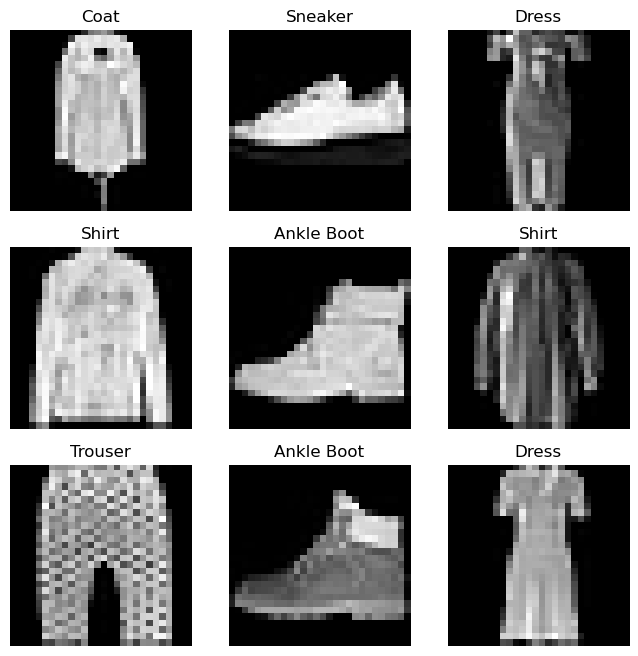

In [81]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


def output_label(label):
    input = label.item() if type(label) == torch.Tensor else label
    return labels_map[input]


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### `Dataloaders` para iterar sobre el `Dataset`

Usar Stochastic gradient descent (SGD) (i.e., entenar de 1 a 1 usando ejemplos aleatorios) permite encontrar óptimos locales relativamente buenos, ¡pero es muy lento!.

Una forma de solucionar esto es usar mini-batches, es decir, un grupo de ejemplos seleccionados aleatoriamente. Para este fin, `pytorch` provee de `DataLoaders`, las cuales son clases que nos permiten generar mini-batches de forma muy sencilla.



In [36]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=True)

Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


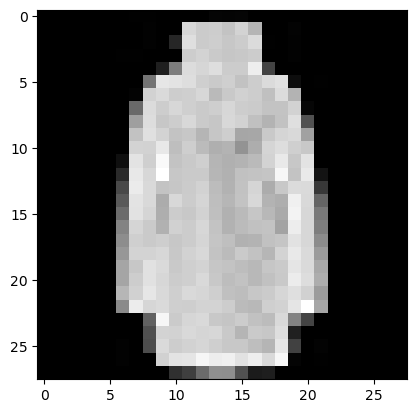

Label: Coat


In [38]:
# Por ejemplo, para mostrar una imagen en particular:

# obtenemos el batch
train_features, train_labels = next(iter(train_loader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# obtenemos el primer elemento
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {output_label(label)}")

In [40]:
# reiniciamos por si acaso...
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=True)

#### La red

En este caso, vamos a implementar nuestra red como una clase. Para que `pytorch` la reconozca como tal, esta debe extender la clase `nn.Module`.

La red estará compuesta por las siguientes capas:

1. 1 capa secuencial compuestas por:
   - Una convoluciónde $3x3$ con padding 1 y salto (stride) de 1.
   - Normalización de Batch.
   - Función de Activación ReLU.
   - Max Pooling de 2*2 y salto (stride) 2.

2. 1 capa secuencial compuestas por:
   - Una convoluciónde $3x3$ con padding 0 y salto (stride) de 1.
   - Normalización de Batch.
   - Función de Activación ReLU.
   - Max Pooling de 2*2 y salto (stride) 2.
   
3. Aplanamiento de la salida convolucional.

4. 3 Capas fully-connected.La última tiene salida de tamaño 10 con Dropout.


Más información acerca de padding, stride y max-pooling: https://speakerdeck.com/mloey/convolutional-neural-network-models?slide=8


In [53]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.fc1 = nn.Linear(in_features=64 * 6 * 6, out_features=600)
        self.relu_1 = nn.ReLU()
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu_1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.relu_2(out)
        out = self.fc3(out)
        # noten que al optimizar con CrossEntropyLoss no necesitamos que la salida sea probabilidad.
        # es decir, no necesitamos poner un softmax previo a la salida
        return out

In [54]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (relu_1): ReLU()
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (relu_2): ReLU()
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)



Making a model of our CNN class

    Creating a object(model in the code)
    Transfering it into GPU if available.
    Defining a Loss function. we're using CrossEntropyLoss() here.
    Using Adam algorithm for optimization purpose.



In [55]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        # Forward pass
        outputs = model(train)
        loss = error(outputs, labels)

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        # Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()

        count += 1

        # Testing the model

        if not (count % 50):  # It's same as "if count % 50 == 0"
            total = 0
            correct = 0

            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)

                test = Variable(images.view(100, 1, 28, 28))

                outputs = model(test)

                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()

                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print(
                "Iteration: {}, Loss: {}, Accuracy: {}%".format(
                    count, loss.data, accuracy
                )
            )

Iteration: 500, Loss: 0.3186243772506714, Accuracy: 87.48999786376953%
Iteration: 1000, Loss: 0.46073734760284424, Accuracy: 88.7300033569336%
Iteration: 1500, Loss: 0.24713067710399628, Accuracy: 90.41999816894531%
Iteration: 2000, Loss: 0.20766548812389374, Accuracy: 89.36000061035156%
Iteration: 2500, Loss: 0.2447202056646347, Accuracy: 91.30999755859375%
Iteration: 3000, Loss: 0.16990020871162415, Accuracy: 91.2699966430664%


In [58]:
from itertools import chain

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(labels_l, predictions_l)
print(
    "Classification report for CNN :\n%s\n"
    % (classification_report(labels_l, predictions_l))
)

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     60000
           1       0.99      0.98      0.98     60000
           2       0.83      0.84      0.83     60000
           3       0.89      0.90      0.89     60000
           4       0.81      0.83      0.82     60000
           5       0.98      0.97      0.97     60000
           6       0.73      0.67      0.70     60000
           7       0.94      0.96      0.95     60000
           8       0.98      0.98      0.98     60000
           9       0.96      0.96      0.96     60000

    accuracy                           0.89    600000
   macro avg       0.89      0.89      0.89    600000
weighted avg       0.89      0.89      0.89    600000


